In [129]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/santandar-processed-data/fdata.csv
/kaggle/input/df-satisfying/df_satisfying.csv
/kaggle/input/vip-preprocessed/VIP data.csv


In [130]:
VIP_data = pd.read_csv("/kaggle/input/santandar-processed-data/fdata.csv")

Consider top 50,00,000 rows of VIP data only

In [131]:
import pandas as pd
VIP_data = VIP_data.sample(n=5000000, random_state=42)

In [132]:
from sklearn.preprocessing import LabelEncoder
date_columns = ['data_date', 'registration_date']
for col in date_columns:
    print(col)
    VIP_data[col] = pd.to_datetime(VIP_data[col])

data_date
registration_date


In [133]:
for col in date_columns:
    print(col)
    VIP_data[col] = (VIP_data[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

data_date
registration_date


In [134]:
categorical_columns = [
    'customer_relation_type_beginning_month', 
    'residence_index', 
    'foreigner_index', 
    'channel_used', 
    'province_name', 
    'segmentation'
]
label_encoders = {}
for col in categorical_columns:
    print(col)
    label_encoders[col] = LabelEncoder()
    VIP_data[col] = label_encoders[col].fit_transform(VIP_data[col].astype(str))

customer_relation_type_beginning_month


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


residence_index


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


foreigner_index


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


channel_used


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


province_name


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


segmentation


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [135]:
columns_to_remove = [
    'employee_index', 'country_residence', 'new_customer_index',
    'primary_customer', 'customer_type_beginning_month',
    'customer_relation_type_beginning_month', 'residence_index',
    'foreigner_index', 'registration_date'
]
VIP_data.drop(columns=columns_to_remove, inplace=True)

In [136]:
VIP_data.isnull().sum()

data_date                        0
gender                           0
seniority                        0
channel_used                     0
province_code                    0
province_name                    0
activity_index                   0
gross_income_household           0
segmentation                     0
prod_savings_account             0
prod_guarantees                  0
prod_current_accounts            0
prod_derivative_account          0
prod_payroll_account             0
prod_junior_account              0
prod_mas_particular_account      0
prod_particular_account          0
prod_particular_plus_account     0
prod_short_term_deposits         0
prod_medium_term_deposits        0
prod_long_term_deposits          0
prod_e_account                   0
prod_funds                       0
prod_mortgage                    0
prod_pensions1                   0
prod_loans                       0
prod_taxes                       0
prod_credit_card                 0
prod_securities     

In [137]:
VIP_data_cleaned = VIP_data.dropna()

In [138]:
VIP_data_cleaned.isnull().sum()

data_date                       0
gender                          0
seniority                       0
channel_used                    0
province_code                   0
province_name                   0
activity_index                  0
gross_income_household          0
segmentation                    0
prod_savings_account            0
prod_guarantees                 0
prod_current_accounts           0
prod_derivative_account         0
prod_payroll_account            0
prod_junior_account             0
prod_mas_particular_account     0
prod_particular_account         0
prod_particular_plus_account    0
prod_short_term_deposits        0
prod_medium_term_deposits       0
prod_long_term_deposits         0
prod_e_account                  0
prod_funds                      0
prod_mortgage                   0
prod_pensions1                  0
prod_loans                      0
prod_taxes                      0
prod_credit_card                0
prod_securities                 0
prod_home_acco

In [139]:
columns_for_clustering = ['data_date', 'employee_index', 'country_residence', 'gender',
                          'registration_date', 'new_customer_index', 'seniority',
                          'primary_customer', 'customer_type_beginning_month',
                          'customer_relation_type_beginning_month', 'residence_index',
                          'foreigner_index', 'channel_used', 'province_code', 'province_name',
                          'activity_index', 'gross_income_household','segmentation','age_group']
print(f"no of cols for clustering: {len(columns_for_clustering)}")

cols_to_remove = ['employee_index', 'country_residence', 'new_customer_index', 
                  'primary_customer', 'customer_type_beginning_month', 
                  'customer_relation_type_beginning_month', 'residence_index', 
                  'foreigner_index', 'registration_date']
print(f"no of cols to remove: {len(cols_to_remove)}")

columns_for_clustering = [col for col in columns_for_clustering if col not in cols_to_remove]

# Display the updated list
print(f"cols for clustering: {columns_for_clustering}")
print(f"no of cols for clustering: {len(columns_for_clustering)}")

no of cols for clustering: 19
no of cols to remove: 9
cols for clustering: ['data_date', 'gender', 'seniority', 'channel_used', 'province_code', 'province_name', 'activity_index', 'gross_income_household', 'segmentation', 'age_group']
no of cols for clustering: 10


In [140]:
from sklearn.cluster import KMeans

additional_labels = ['prod_savings_account', 'prod_guarantees', 'prod_current_accounts', 
                     'prod_derivative_account', 'prod_payroll_account', 'prod_junior_account', 
                     'prod_mas_particular_account', 'prod_particular_account', 
                     'prod_particular_plus_account', 'prod_short_term_deposits', 
                     'prod_medium_term_deposits', 'prod_long_term_deposits', 
                     'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1', 
                     'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities', 
                     'prod_home_account', 'prod_payroll', 'prod_pensions2', 'prod_direct_debit']
print(f"number of products: {len(additional_labels)}")

number of products: 24


In [141]:
X = VIP_data_cleaned

In [142]:
X_ = X[columns_for_clustering]
y = X[additional_labels]

In [143]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

In [145]:
if isinstance(y_train, pd.Series):
    y_train = y_train.to_frame()


X1 = pd.concat([X_train, y_train], axis=1)

In [146]:
X1.head()

,data_date,gender,seniority,channel_used,province_code,province_name,activity_index,gross_income_household,segmentation,age_group,...,prod_mortgage,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit
827443,1425081600,0,240.0,24,28.0,30,1.0,332146.53,1,3,...,0,0,0,0,0,0,0,0.0,0.0,0
8452344,1451260800,0,27.0,122,46.0,48,0.0,120635.55,1,1,...,0,0,0,0,0,0,0,0.0,0.0,0
12360460,1461801600,0,53.0,150,28.0,30,1.0,125469.06,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
8540827,1451260800,1,168.0,122,28.0,30,0.0,232583.22,1,3,...,0,0,0,0,0,0,0,0.0,0.0,0
1992371,1430179200,1,106.0,122,28.0,30,1.0,150441.18,1,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [147]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
wcss = []

k_range = range(1, 11)

for k in k_range:
    print(k,end="")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)


plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

1

KeyboardInterrupt: 

In [148]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X1)

KMeans(n_clusters=3, random_state=42)

In [150]:
cluster_labels = kmeans.predict(X1)
X_train['cluster_labels'] = cluster_labels

In [151]:
X_train['cluster_labels'].value_counts()

cluster_labels
1    1626731
2    1273179
0    1100018
Name: count, dtype: int64

In [153]:
import pandas as pd
random_row_dict = VIP_data.sample(n=1).to_dict(orient='records')
for key, value in random_row_dict[0].items():
    print(f"{key}: {value}")

data_date: 1438041600
gender: 1
seniority: 9.0
channel_used: 150
province_code: 8.0
province_name: 8
activity_index: 1.0
gross_income_household: 101850.0
segmentation: 0
prod_savings_account: 0
prod_guarantees: 0
prod_current_accounts: 1
prod_derivative_account: 0
prod_payroll_account: 0
prod_junior_account: 0
prod_mas_particular_account: 0
prod_particular_account: 0
prod_particular_plus_account: 0
prod_short_term_deposits: 0
prod_medium_term_deposits: 0
prod_long_term_deposits: 0
prod_e_account: 0
prod_funds: 0
prod_mortgage: 0
prod_pensions1: 0
prod_loans: 0
prod_taxes: 0
prod_credit_card: 0
prod_securities: 0
prod_home_account: 0
prod_payroll: 0.0
prod_pensions2: 0.0
prod_direct_debit: 0
age_group: 1


In [154]:
X2 = pd.concat([X_test, y_test], axis=1)

In [155]:
X2.head()

,data_date,gender,seniority,channel_used,province_code,province_name,activity_index,gross_income_household,segmentation,age_group,...,prod_mortgage,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit
10222808,1456617600,1,162.0,122,41.0,43,0.0,44748.42,1,2,...,0,0,0,0,0,0,0,0.0,0.0,0
2251811,1430179200,1,22.0,24,28.0,30,1.0,106133.07,0,1,...,0,0,0,0,0,0,0,0.0,0.0,1
12990624,1464393600,1,229.0,24,48.0,9,1.0,101850.00,1,2,...,0,0,0,0,0,0,0,0.0,0.0,0
6530746,1445990400,0,2.0,158,15.0,18,0.0,77960.76,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
4760775,1440720000,1,118.0,24,28.0,30,0.0,69709.05,1,3,...,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
# columns_to_sum = ['prod_savings_account', 'prod_guarantees', 'prod_current_accounts', 'prod_derivative_account',
#                   'prod_payroll_account', 'prod_junior_account', 'prod_mas_particular_account',
#                   'prod_particular_account', 'prod_particular_plus_account', 'prod_short_term_deposits',
#                   'prod_medium_term_deposits', 'prod_long_term_deposits', 'prod_e_account', 'prod_funds',
#                   'prod_mortgage', 'prod_pensions1', 'prod_loans', 'prod_taxes', 'prod_credit_card',
#                   'prod_securities', 'prod_home_account', 'prod_payroll', 'prod_pensions2', 'prod_direct_debit']


# for index, row in X2.iterrows():
#     row_sum = row[columns_to_sum].sum()
#     if row_sum > 4:
#         print("Row at index {} satisfies the condition:".format(index))
#         print(row)
#         break
# else:
#     print("No row found satisfying the condition.")


In [ ]:
# import pandas as pd
# from tqdm import tqdm
# columns_to_sum = ['prod_savings_account', 'prod_guarantees', 'prod_current_accounts', 'prod_derivative_account',
#                   'prod_payroll_account', 'prod_junior_account', 'prod_mas_particular_account',
#                   'prod_particular_account', 'prod_particular_plus_account', 'prod_short_term_deposits',
#                   'prod_medium_term_deposits', 'prod_long_term_deposits', 'prod_e_account', 'prod_funds',
#                   'prod_mortgage', 'prod_pensions1', 'prod_loans', 'prod_taxes', 'prod_credit_card',
#                   'prod_securities', 'prod_home_account', 'prod_payroll', 'prod_pensions2', 'prod_direct_debit']

# satisfying_rows = []

# for index, row in tqdm(X2.iterrows(), total=len(X2)):
#     row_sum = row[columns_to_sum].sum()
#     if row_sum > 5:
#         satisfying_rows.append(row)
#     if index == 300000:
#         break
# df_satisfying = pd.DataFrame(satisfying_rows)

In [156]:
df_satisfying = pd.read_csv('/kaggle/input/df-satisfying/df_satisfying.csv')

In [ ]:
cluster_labels = kmeans.predict(df_satisfying)
df_satisfying['cluster_labels'] = cluster_labels

In [159]:
df_satisfying.head()

,data_date,gender,seniority,channel_used,province_code,province_name,activity_index,gross_income_household,segmentation,age_group,...,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit,cluster_labels
0,1.459123e+09,1.0,183.0,24.0,28.0,30.0,1.0,84119.64,2.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1
1,1.443398e+09,0.0,209.0,24.0,28.0,30.0,1.0,101850.00,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2
2,1.461802e+09,1.0,222.0,24.0,7.0,7.0,1.0,221733.09,2.0,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1
3,1.464394e+09,1.0,193.0,24.0,46.0,48.0,1.0,63372.18,2.0,2.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1
4,1.448669e+09,1.0,239.0,24.0,28.0,30.0,1.0,440587.98,1.0,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2


In [160]:
df_satisfying['cluster_labels'].value_counts()

cluster_labels
0    8354
1    8120
2    7056
Name: count, dtype: int64

In [161]:
data = {
    'data_date': [1430179200.0],
    'gender': [0.0],
    'seniority': [200.0],
    'channel_used': [22.0],
    'province_code': [28.0],
    'province_name': [30.0],
    'activity_index': [1.000000e+00],
    'gross_income_household': [116833.62],
    'segmentation': [2.000000e+00],
    'age_group': [2.0]
}

new_user =  pd.DataFrame(data)

In [ ]:
# rows_from_cluster_0 = df_satisfying[df_satisfying['cluster_labels'] == 0]

In [ ]:
# row_from_cluster_0 = rows_from_cluster_0.sample(n=1)
# row_from_cluster_0.columns

In [ ]:
# columns_to_keep = [
#     'data_date',
#     'gender',
#     'seniority',
#     'channel_used',
#     'province_code',
#     'province_name',
#     'activity_index',
#     'gross_income_household',
#     'segmentation',
#     'age_group'
# ]

In [ ]:
# new_user = row_from_cluster_0[columns_to_keep]
# new_user

In [162]:
for col in new_user.columns:
    print(f"{col}: {new_user[col].iloc[0]}")

data_date: 1430179200.0
gender: 0.0
seniority: 200.0
channel_used: 22.0
province_code: 28.0
province_name: 30.0
activity_index: 1.0
gross_income_household: 116833.62
segmentation: 2.0
age_group: 2.0


In [163]:
new_user_already_used = {
    "prod_payroll_account" : 1,
    "prod_pensions2" :1,
    "prod_payroll":1,
    "prod_pensions1":1
}

In [164]:
new_user_product_values = {label: new_user_already_used.get(label, 0) for label in additional_labels}

In [165]:
import warnings
warnings.filterwarnings("ignore")

In [166]:
for col, val in new_user_product_values.items():
    new_user[col] = val

In [167]:
new_user.head()

,data_date,gender,seniority,channel_used,province_code,province_name,activity_index,gross_income_household,segmentation,age_group,...,prod_mortgage,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit
0,1.430179e+09,0.0,200.0,22.0,28.0,30.0,1.0,116833.62,2.0,2.0,...,0,1,0,0,0,0,0,1,1,0


In [168]:
new_user.columns

Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
       'province_name', 'activity_index', 'gross_income_household',
       'segmentation', 'age_group', 'prod_savings_account', 'prod_guarantees',
       'prod_current_accounts', 'prod_derivative_account',
       'prod_payroll_account', 'prod_junior_account',
       'prod_mas_particular_account', 'prod_particular_account',
       'prod_particular_plus_account', 'prod_short_term_deposits',
       'prod_medium_term_deposits', 'prod_long_term_deposits',
       'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1',
       'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities',
       'prod_home_account', 'prod_payroll', 'prod_pensions2',
       'prod_direct_debit'],
      dtype='object')

In [169]:
cluster_labels = kmeans.predict(new_user)

In [170]:
similar_users = X_train[X_train['cluster_labels'] == cluster_labels[0]]

In [171]:
similar_users.head()

,data_date,gender,seniority,channel_used,province_code,province_name,activity_index,gross_income_household,segmentation,age_group,cluster_labels
827443,1425081600,0,240.0,24,28.0,30,1.0,332146.53,1,3,0
1992371,1430179200,1,106.0,122,28.0,30,1.0,150441.18,1,0,0
798586,1425081600,0,178.0,122,8.0,8,1.0,160443.63,1,2,0
1901422,1430179200,1,115.0,35,28.0,30,1.0,109978.32,1,2,0
591615,1422403200,1,111.0,122,39.0,13,1.0,154668.90,1,1,0


In [172]:
similar_users["cluster_labels"].value_counts()

cluster_labels
0    1100018
Name: count, dtype: int64

In [173]:
similar_users_X = X.loc[similar_users.index]

In [174]:
similar_users_X.columns

Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
       'province_name', 'activity_index', 'gross_income_household',
       'segmentation', 'prod_savings_account', 'prod_guarantees',
       'prod_current_accounts', 'prod_derivative_account',
       'prod_payroll_account', 'prod_junior_account',
       'prod_mas_particular_account', 'prod_particular_account',
       'prod_particular_plus_account', 'prod_short_term_deposits',
       'prod_medium_term_deposits', 'prod_long_term_deposits',
       'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1',
       'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities',
       'prod_home_account', 'prod_payroll', 'prod_pensions2',
       'prod_direct_debit', 'age_group'],
      dtype='object')

In [175]:
similar_user_columns = ['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
       'province_name', 'activity_index', 'gross_income_household',
       'segmentation', 'prod_savings_account', 'prod_guarantees',
       'prod_current_accounts', 'prod_derivative_account',
       'prod_payroll_account', 'prod_junior_account',
       'prod_mas_particular_account', 'prod_particular_account',
       'prod_particular_plus_account', 'prod_short_term_deposits',
       'prod_medium_term_deposits', 'prod_long_term_deposits',
       'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1',
       'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities',
       'prod_home_account', 'prod_payroll', 'prod_pensions2',
       'prod_direct_debit', 'age_group']

new_user_reordered = new_user[similar_user_columns]

In [176]:
new_user_reordered.columns

Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
       'province_name', 'activity_index', 'gross_income_household',
       'segmentation', 'prod_savings_account', 'prod_guarantees',
       'prod_current_accounts', 'prod_derivative_account',
       'prod_payroll_account', 'prod_junior_account',
       'prod_mas_particular_account', 'prod_particular_account',
       'prod_particular_plus_account', 'prod_short_term_deposits',
       'prod_medium_term_deposits', 'prod_long_term_deposits',
       'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1',
       'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities',
       'prod_home_account', 'prod_payroll', 'prod_pensions2',
       'prod_direct_debit', 'age_group'],
      dtype='object')

# Cosine Similarity

In [195]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between the new user and each row of similar_users_X
cosine_similarities = cosine_similarity(new_user.values.reshape(1, -1), similar_users_X.values)

# Flatten the cosine_similarities array
cosine_similarities_flat = cosine_similarities.flatten()

# Get the indices of rows in similar_users_X sorted based on cosine similarity scores
sorted_indices = cosine_similarities_flat.argsort()[::-1]

# Get the sorted cosine similarity scores
sorted_cosine_similarities = cosine_similarities_flat[sorted_indices]


top_similar_users_indices = sorted_indices[:100]
top_cosine_similarity_scores = sorted_cosine_similarities[:100]


for i, (index, cosine_sim) in enumerate(zip(top_similar_users_indices, top_cosine_similarity_scores), 1):
    print(f"Top {i}: Row Index = {index}, Cosine Similarity Score = {cosine_sim}")


Top 1: Row Index = 684178, Cosine Similarity Score = 1.0000000000000002
Top 2: Row Index = 1049236, Cosine Similarity Score = 1.0
Top 3: Row Index = 747517, Cosine Similarity Score = 1.0
Top 4: Row Index = 952579, Cosine Similarity Score = 1.0
Top 5: Row Index = 170510, Cosine Similarity Score = 1.0
Top 6: Row Index = 289001, Cosine Similarity Score = 1.0
Top 7: Row Index = 612131, Cosine Similarity Score = 1.0
Top 8: Row Index = 837558, Cosine Similarity Score = 0.9999999999999999
Top 9: Row Index = 918300, Cosine Similarity Score = 0.9999999999999999
Top 10: Row Index = 135859, Cosine Similarity Score = 0.9999999999999999
Top 11: Row Index = 479467, Cosine Similarity Score = 0.9999999999999999
Top 12: Row Index = 587272, Cosine Similarity Score = 0.9999999999999999
Top 13: Row Index = 145907, Cosine Similarity Score = 0.9999999999999999
Top 14: Row Index = 788692, Cosine Similarity Score = 0.9999999999999999
Top 15: Row Index = 262098, Cosine Similarity Score = 0.9999999999999999
Top

In [196]:
top_similar_users_indices = sorted_indices[:100]

top_similar_users = similar_users_X.iloc[top_similar_users_indices]

In [197]:
top_similar_users

,data_date,gender,seniority,channel_used,province_code,province_name,activity_index,gross_income_household,segmentation,prod_savings_account,...,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit,age_group
852639,1425081600,0,209.0,23,28.0,30,1.0,116408.73,1,0,...,0,0,0,0,0,0,1.0,1.0,1,2
3576628,1435449600,1,191.0,23,25.0,28,0.0,117283.86,1,0,...,0,0,0,0,0,0,0.0,0.0,0,2
2931234,1432771200,0,182.0,24,28.0,30,0.0,117030.30,1,0,...,0,0,0,0,0,0,0.0,0.0,0,2
447498,1422403200,1,193.0,24,28.0,30,1.0,116210.04,1,0,...,0,0,1,0,0,0,0.0,1.0,1,3
2030291,1430179200,0,196.0,24,28.0,30,1.0,116850.09,1,0,...,0,0,0,0,0,0,0.0,0.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565954,1435449600,1,175.0,24,28.0,30,1.0,117336.45,1,0,...,1,0,1,0,1,0,0.0,0.0,0,2
880868,1425081600,0,149.0,5,8.0,8,1.0,116374.11,1,0,...,0,0,0,0,0,0,0.0,0.0,0,2
861536,1425081600,1,157.0,11,28.0,30,1.0,116355.42,1,0,...,0,0,0,0,0,0,0.0,1.0,1,2
608675,1422403200,1,126.0,24,41.0,43,0.0,116181.15,1,0,...,0,0,0,0,0,0,0.0,0.0,0,2


In [198]:
product_columns = ['prod_savings_account', 'prod_guarantees', 'prod_current_accounts', 
                   'prod_derivative_account', 'prod_payroll_account', 'prod_junior_account', 
                   'prod_mas_particular_account', 'prod_particular_account', 
                   'prod_particular_plus_account', 'prod_short_term_deposits', 
                   'prod_medium_term_deposits', 'prod_long_term_deposits', 
                   'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1', 
                   'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities', 
                   'prod_home_account', 'prod_payroll', 'prod_pensions2', 'prod_direct_debit']


column_scores = {col: 0 for col in product_columns}
for index, cosine_similarity_score in zip(top_similar_users_indices, top_cosine_similarity_scores):
    row = similar_users_X.iloc[index]
    for col in product_columns:
        score = row[col] * cosine_similarity_score
        column_scores[col] += score
for col, score in column_scores.items():
    print(f"Column: {col}, Score: {score}")

Column: prod_savings_account, Score: 0.0
Column: prod_guarantees, Score: 0.0
Column: prod_current_accounts, Score: 63.0
Column: prod_derivative_account, Score: 0.0
Column: prod_payroll_account, Score: 18.999999999999996
Column: prod_junior_account, Score: 0.0
Column: prod_mas_particular_account, Score: 0.0
Column: prod_particular_account, Score: 45.0
Column: prod_particular_plus_account, Score: 7.999999999999996
Column: prod_short_term_deposits, Score: 0.0
Column: prod_medium_term_deposits, Score: 0.0
Column: prod_long_term_deposits, Score: 13.999999999999993
Column: prod_e_account, Score: 14.99999999999999
Column: prod_funds, Score: 7.999999999999995
Column: prod_mortgage, Score: 0.9999999999999992
Column: prod_pensions1, Score: 1.9999999999999982
Column: prod_loans, Score: 0.0
Column: prod_taxes, Score: 9.999999999999993
Column: prod_credit_card, Score: 7.999999999999995
Column: prod_securities, Score: 8.999999999999995
Column: prod_home_account, Score: 1.9999999999999993
Column: pro

In [199]:
items = sorted(column_scores.items(),key = lambda x: x[1],reverse=True)
for col, score in items[:15]:
    if col in new_user_already_used or score <=0:
        continue
    print(f"Column: {col}, Score: {score}")

Column: prod_current_accounts, Score: 63.0
Column: prod_particular_account, Score: 45.0
Column: prod_direct_debit, Score: 26.0
Column: prod_e_account, Score: 14.99999999999999
Column: prod_long_term_deposits, Score: 13.999999999999993
Column: prod_taxes, Score: 9.999999999999993
Column: prod_securities, Score: 8.999999999999995
Column: prod_particular_plus_account, Score: 7.999999999999996
Column: prod_funds, Score: 7.999999999999995
Column: prod_credit_card, Score: 7.999999999999995
Column: prod_home_account, Score: 1.9999999999999993


# Pairwise distance

In [200]:
from sklearn.metrics import pairwise_distances

# Compute pairwise distances between the new user and each row of similar_users_X
distances = pairwise_distances(new_user.values.reshape(1, -1), similar_users_X.values, metric='euclidean')

# Flatten the distances array
distances_flat = distances.flatten()

# Get the indices of rows in similar_users_X sorted based on distances
sorted_indices = distances_flat.argsort()

# Get the sorted distances
sorted_distances = distances_flat[sorted_indices]

# Get the row indices and distances of the top similar users
top_similar_users_indices = sorted_indices[:100]
top_distances = sorted_distances[:100]

column_scores_d = {col: 0 for col in product_columns}


for index, distance in zip(top_similar_users_indices, top_distances):
    row = similar_users_X.iloc[index]
    for col in product_columns:
        score = row[col] / (distance + 1e-6)
        column_scores_d[col] += score

for col, score in column_scores_d.items():
    print(f"Column: {col}, Score: {score}")


Column: prod_savings_account, Score: 0.0
Column: prod_guarantees, Score: 0.0
Column: prod_current_accounts, Score: 0.6342793563961633
Column: prod_derivative_account, Score: 0.0
Column: prod_payroll_account, Score: 0.2610736639464886
Column: prod_junior_account, Score: 0.0
Column: prod_mas_particular_account, Score: 0.006944444396219137
Column: prod_particular_account, Score: 0.5460174170171136
Column: prod_particular_plus_account, Score: 0.03849488430905923
Column: prod_short_term_deposits, Score: 0.0
Column: prod_medium_term_deposits, Score: 0.0
Column: prod_long_term_deposits, Score: 0.11679150512218045
Column: prod_e_account, Score: 0.24023436258798475
Column: prod_funds, Score: 0.05271561934664167
Column: prod_mortgage, Score: 0.014735656121237933
Column: prod_pensions1, Score: 0.0
Column: prod_loans, Score: 0.0
Column: prod_taxes, Score: 0.06609988604905993
Column: prod_credit_card, Score: 0.14548644415981926
Column: prod_securities, Score: 0.058174984757610154
Column: prod_home_

In [201]:
# Print the scores for each column
items = sorted(column_scores_d.items(),key = lambda x: x[1],reverse=True)
for col, score in items[:15]:
    if col in new_user_already_used or score <=0:
        continue
    print(f"Column: {col}, Score: {score}")

Column: prod_current_accounts, Score: 0.6342793563961633
Column: prod_particular_account, Score: 0.5460174170171136
Column: prod_direct_debit, Score: 0.35043380959545606
Column: prod_e_account, Score: 0.24023436258798475
Column: prod_credit_card, Score: 0.14548644415981926
Column: prod_long_term_deposits, Score: 0.11679150512218045
Column: prod_taxes, Score: 0.06609988604905993
Column: prod_securities, Score: 0.058174984757610154
Column: prod_funds, Score: 0.05271561934664167
Column: prod_particular_plus_account, Score: 0.03849488430905923
Column: prod_mortgage, Score: 0.014735656121237933
Column: prod_mas_particular_account, Score: 0.006944444396219137


# Category Based Recommendation

In [202]:
bank_products = {
    "Accounts and Deposits": [
        "prod_savings_account",
        "prod_junior_account",
        "prod_mas_particular_account",
        "prod_particular_account",
        "prod_particular_plus_account",
        "prod_home_account",
        "prod_e_account",
        "prod_current_accounts",
        "prod_payroll_account"
    ],
    "Investment Products": [
        "prod_funds",
        "prod_securities",
        "prod_derivative_account",
        "prod_short_term_deposits",
        "prod_medium_term_deposits",
        "prod_long_term_deposits"
    ],
    "Loans and Financing": [
        "prod_mortgage",
        "prod_loans",
        "prod_credit_card"
    ],
    "Pensions and Retirement": [
        "prod_pensions1",
        "prod_pensions2"
    ],
    "Payment Services": [
        "prod_payroll",
        "prod_direct_debit"
    ],
    "Other Financial Products": [
        "prod_guarantees",
        "prod_taxes"
    ]
}

In [203]:
def get_product_genres(products):
    genres = set()
    for product in products:
        for genre, products_list in bank_products.items():
            if product in products_list:
                genres.add(genre)
    return genres

In [204]:
products = [prod for prod in new_user_already_used]
genres = get_product_genres(products)
print(genres)

{'Accounts and Deposits', 'Payment Services', 'Pensions and Retirement'}


In [205]:
selected_cols = []

items = sorted(column_scores_d.items(),key = lambda x: x[1],reverse=True)
for col, score in items[:15]:
    
    if col not in new_user_already_used and score > 0:
        selected_cols.append(col)
genres_rec_pd = get_product_genres(selected_cols)
print(genres_rec_pd)

{'Accounts and Deposits', 'Investment Products', 'Payment Services', 'Loans and Financing', 'Other Financial Products'}


In [206]:
selected_cols = []

items = sorted(column_scores.items(),key = lambda x: x[1],reverse=True)
for col, score in items[:15]:
    
    if col not in new_user_already_used and score > 0:
        selected_cols.append(col)
genres_rec_cs = get_product_genres(selected_cols)
print(genres_rec_cs)

{'Accounts and Deposits', 'Investment Products', 'Payment Services', 'Loans and Financing', 'Other Financial Products'}


# Category Jaccard Similarity

## Actual vs PairWise Distance

In [207]:
set1 = genres
set2 = genres_rec_pd
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))
jaccard_similarity = intersection / union
print("Jaccard Similarity Score:", jaccard_similarity)

Jaccard Similarity Score: 0.3333333333333333


## Actual vs Cosine Similarity

In [208]:
set1 = genres
set2 = genres_rec_cs
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))
jaccard_similarity = intersection / union
print("Jaccard Similarity Score:", jaccard_similarity)

Jaccard Similarity Score: 0.3333333333333333


# Association Rule Mining

In [214]:
X1.columns

Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
       'province_name', 'activity_index', 'gross_income_household',
       'segmentation', 'age_group', 'prod_savings_account', 'prod_guarantees',
       'prod_current_accounts', 'prod_derivative_account',
       'prod_payroll_account', 'prod_junior_account',
       'prod_mas_particular_account', 'prod_particular_account',
       'prod_particular_plus_account', 'prod_short_term_deposits',
       'prod_medium_term_deposits', 'prod_long_term_deposits',
       'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1',
       'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities',
       'prod_home_account', 'prod_payroll', 'prod_pensions2',
       'prod_direct_debit'],
      dtype='object')

In [215]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999928 entries, 827443 to 12954436
Data columns (total 34 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   data_date                     int64  
 1   gender                        int64  
 2   seniority                     float64
 3   channel_used                  int64  
 4   province_code                 float64
 5   province_name                 int64  
 6   activity_index                float64
 7   gross_income_household        float64
 8   segmentation                  int64  
 9   age_group                     int64  
 10  prod_savings_account          int64  
 11  prod_guarantees               int64  
 12  prod_current_accounts         int64  
 13  prod_derivative_account       int64  
 14  prod_payroll_account          int64  
 15  prod_junior_account           int64  
 16  prod_mas_particular_account   int64  
 17  prod_particular_account       int64  
 18  prod_particular_plus_

In [216]:
bank_service_cols= ['prod_savings_account', 'prod_guarantees', 'prod_current_accounts', 
                   'prod_derivative_account', 'prod_payroll_account', 'prod_junior_account', 
                   'prod_mas_particular_account', 'prod_particular_account', 
                   'prod_particular_plus_account', 'prod_short_term_deposits', 
                   'prod_medium_term_deposits', 'prod_long_term_deposits', 
                   'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1', 
                   'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities', 
                   'prod_home_account', 'prod_payroll', 'prod_pensions2', 'prod_direct_debit']

In [217]:
X1[bank_service_cols] = X1[bank_service_cols].astype(bool)

In [218]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(X1[bank_service_cols], min_support=0.01, use_colnames=True)

In [224]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Display the association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(prod_particular_account),(prod_current_accounts),0.129190,0.655991,0.085261,0.659966,1.006061,0.000514,1.011693,0.006918
1,(prod_current_accounts),(prod_particular_account),0.655991,0.129190,0.085261,0.129973,1.006061,0.000514,1.000900,0.017512
2,(prod_particular_plus_account),(prod_current_accounts),0.043463,0.655991,0.023567,0.542230,0.826582,-0.004944,0.751489,-0.179881
3,(prod_long_term_deposits),(prod_current_accounts),0.043064,0.655991,0.029206,0.678198,1.033854,0.000956,1.069010,0.034219
4,(prod_e_account),(prod_current_accounts),0.082749,0.655991,0.044087,0.532777,0.812172,-0.010196,0.736286,-0.201360
...,...,...,...,...,...,...,...,...,...,...
600,(prod_pensions2),"(prod_payroll_account, prod_credit_card, prod_...",0.059422,0.016385,0.016385,0.275738,16.828906,0.015411,1.358093,1.000000
601,(prod_credit_card),"(prod_payroll_account, prod_pensions2, prod_di...",0.044355,0.040717,0.016385,0.369403,9.072510,0.014579,1.521230,0.931075
602,(prod_direct_debit),"(prod_payroll_account, prod_pensions2, prod_cr...",0.128033,0.018146,0.016385,0.127973,7.052471,0.014062,1.125945,0.984218
603,(prod_payroll_account),"(prod_pensions2, prod_direct_debit, prod_credi...",0.081092,0.017285,0.016385,0.202051,11.689161,0.014983,1.231550,0.995150


In [225]:
def search_association_rules(association_rules_df, input_products, min_support=0.1, min_confidence=0.5, min_lift=1.0):
    # Initialize an empty list to store the search results
    search_results = []

    # Iterate through each row of the association rules DataFrame
    for index, row in association_rules_df.iterrows():
        # Check if any product from the input list is in the antecedents of the rule
        if any(product in row['antecedents'] for product in input_products):
            # Check if the rule meets the specified threshold conditions
            if row['support'] >= min_support and row['confidence'] >= min_confidence and row['lift'] >= min_lift:
                # Add the entire row to the search results list
                search_results.append(row)

    # Concatenate the list of search results into a DataFrame
    search_results_df = pd.DataFrame(search_results)

    return search_results_df

In [226]:
consequents = search_association_rules(rules, ["prod_payroll_account",
    "prod_pensions2",
    "prod_payroll", "prod_pensions1"],0.02,0.1, 5.0)
consequents

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,(prod_payroll_account),(prod_taxes),0.081092,0.051879,0.023808,0.293593,5.659222,0.019601,1.342174,0.895952
18,(prod_payroll_account),(prod_credit_card),0.081092,0.044355,0.025370,0.312849,7.053333,0.021773,1.390736,0.933960
20,(prod_payroll_account),(prod_payroll),0.081092,0.054694,0.051445,0.634401,11.599056,0.047010,2.585639,0.994427
21,(prod_payroll),(prod_payroll_account),0.054694,0.081092,0.051445,0.940596,11.599056,0.047010,15.468772,0.966657
22,(prod_payroll_account),(prod_pensions2),0.081092,0.059422,0.055790,0.687974,11.577850,0.050971,3.014423,0.994255
...,...,...,...,...,...,...,...,...,...,...
467,"(prod_pensions2, prod_payroll)","(prod_payroll_account, prod_direct_debit)",0.054694,0.059326,0.040717,0.744443,12.548274,0.037472,3.680874,0.973556
468,"(prod_direct_debit, prod_payroll)","(prod_payroll_account, prod_pensions2)",0.042887,0.055790,0.040717,0.949390,17.017353,0.038324,18.656477,0.983412
469,(prod_payroll_account),"(prod_pensions2, prod_direct_debit, prod_payroll)",0.081092,0.042887,0.040717,0.502103,11.707496,0.037239,1.922309,0.995296
470,(prod_pensions2),"(prod_payroll_account, prod_direct_debit, prod...",0.059422,0.040717,0.040717,0.685218,16.828906,0.038297,3.047453,1.000000


In [227]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def plot_association_rules_graph(association_rules_df):

    # Sort association rules DataFrame based on confidence in decreasing order
    association_rules_df = association_rules_df.sort_values(by='confidence', ascending=False)

    # Select top 10 rows
    top_10_rules_df = association_rules_df.head(10)

    # Create a directed graph
    G = nx.DiGraph()

    # Add edges to the graph based on top 10 association rules
    for _, row in top_10_rules_df.iterrows():
        antecedents = row['antecedents']
        consequents = row['consequents']
        support = round(row['support'], 3)  # Round off support to 3 decimal precision
        for antecedent in antecedents:
            for consequent in consequents:
                # Add edge with support as weight
                G.add_edge(antecedent, consequent, weight=support)

    # Plot the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=7, font_weight='bold')
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Association Rules Graph')
    plt.show()


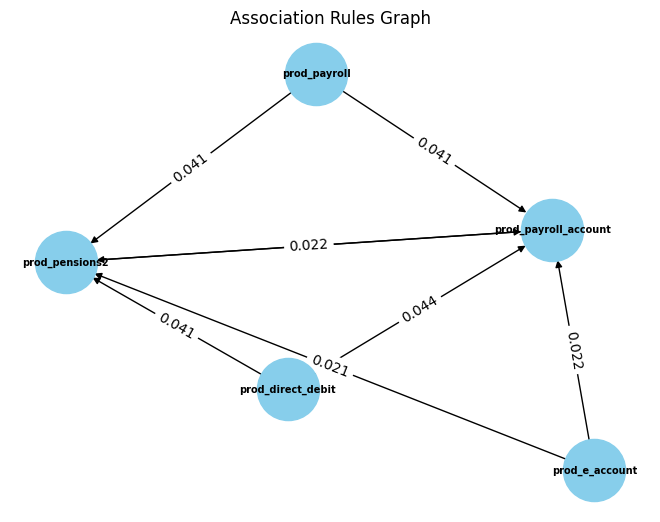

In [228]:
plot_association_rules_graph(consequents)